In [9]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint
from gekko import GEKKO
m = GEKKO()

In [10]:
!pip install gekko


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Préliminaires

Notre fonction :
$$
f(x_1,x_2) = x_1^2 + x_2^2 -14x_1 - 6x_2 -7 
$$
et les contraintes :
$$

K = {(x_1,x_2)  R^2 | x_1 + x_2 <= 2 ; x_1 +  2x_2 <= 3 }
$$

On regarde le Lagrangien : 

$$
L(x_1,x_2,\lambda _1 , \lambda _2 ) = x_1^2 + x_2^2 -14x_1 - 6x_2 -7  + \lambda _1 (x_1 + x_2 -2) +  \lambda _2 (-x_1 +  2x_2-3)
$$


Sans les contraintes on aurait comme point critique : 
$$
\nabla f = \vec{(2x_1 - 14, 2x_2 - 6)}
$$

Donc le minimun global serait en  (7,3) mais il est hors des contraintes on regarde donc avec $\lambda _1 $, $\lambda _2 $ plus grand que 0.  
Nos deux contraintes sont affine donc les contraintes sont qualifiés ont a donc avec KKT :

$$
\begin{cases}
 2x_1 -14 + \lambda _1 + \lambda _2 = 0 \\
 2x_1 -6 + \lambda _1 + 2\lambda _2 = 0 \\ 
 \lambda _1(x_1 + x_2 -2) = 0 \\
 \lambda _2(x_1 + 2x_2 -3) = 0 \\
 \lambda _1 , \lambda _2 >=0 \\
\end{cases}

$$

On différentie les cas : $\lambda _1 > 0  \lambda _2 = 0 $

$$
\begin{cases}
x_1 + x_2 = 2  \\
x_1 -x_2 = 4  (L1 - L2) \\

<=> x_1 = 3,x_2 = -1 
 \end{cases}
$$

cas : $\lambda _1 = 0  \lambda _2 > 0 $
$$
\begin{cases}
x_1 + 2x_2 = 3  \\
x_1 -x_2 = 4  (L1 - L2) \\

<=> x_1 = 5,x_2 = 1 
 \end{cases}
$$

(3,-1) respecte les contraintes , (5,1) ne les respectes pas donc (3,-1) est le minimum recherché


In [11]:
#TP1 PRELIMINAIRES
m = GEKKO(remote=True)

x1,x2 = [m.Var() for i in range(2)]

x1.value=5
x2.value=10

#contraintes
m.Equation(x1+x2<=2)
m.Equation(x1+2*x2<=3)
#optimisation a faire 
m.Obj(x1**2+x2**2-14*x1-6*x2-7)

m.options.IMODE = 3 

#Solve simulation
m.solve() 

print('')
print('Results')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))

apm 83.192.3.180_gk_model7 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              4
 Number of total equations: -            2
 Number of slack variables: -            2
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program cont

gradient =0 pour point critique puis on verifie les contraintes



# Probleme de contôle optimal à résoudre numériquement 1 :

2.8051981743e-16
-0.99395587784
RESULT =  [2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.403

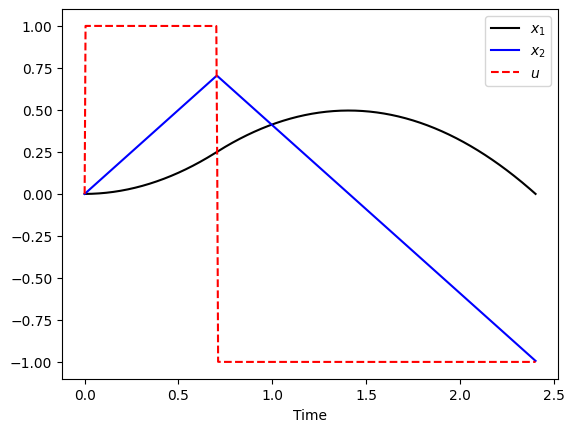

In [12]:
#2eme partie


m = GEKKO() # initialize gekkofor 
nt = 501
m.time = np.linspace(0,1,nt)



# Variables
x = m.Var(value=0)
y = m.Var(value=0)

#print(x.shape,y.shape)
p = np.zeros(nt) # mark final time point
p[-1] = 1.0
final = m.Param(value=p)

#temps final(ce qu'on cherche)
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1

u = m.MV(value=0,lb=-1,ub=1)
u.STATUS = 1

# Equations
m.Equation(x.dt()==y*tf)
m.Equation(y.dt()==u*tf)
m.Equation(x*final==0)


m.Obj(tf+(y*final+1)**2*100000) #il faut forcer une contraint a etre respecte sinon il ne trouve pas( on force y*final a etre -1 ou x a etre 0 )
m.options.IMODE = 6
m.solve(disp=False) # solve

print(x.value[-1])
print(y.value[-1])
print("RESULT = ",tf.value)

print('Final Time: ' + str(tf.value[0]))
tm = np.linspace(0,tf.value[0],nt)
plt.figure(1)
plt.plot(tm,x.value,'k-',label=r'$x_1$')
plt.plot(tm,y.value,'b-',label=r'$x_2$')
plt.plot(tm,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()


# TRAM 2


-5.0083229543e-13
-1.0015947291
RESULT =  [13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.446225438, 13.44

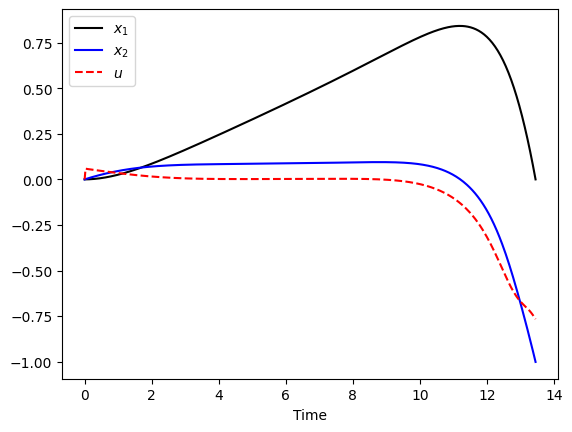

In [13]:
#3eme partie

eps = 0.1
alpha = 0.0000001
m = GEKKO() # initialize gekkofor 
nt = 501
m.time = np.linspace(0,1,nt)

# Variables
x = m.Var(value=0)
y = m.Var(value=0)
z = m.Var(value=0)


#print(x.shape,y.shape)
p = np.zeros(nt) # mark final time point
p[-1] = 1.0
final = m.Param(value=p)

#temps final(ce qu'on cherche)
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1

u = m.MV(value=0,lb=-1,ub=1)
u.STATUS = 1

# Equations
m.Equation(x.dt()==y*tf)
m.Equation(y.dt()==u*tf)
m.Equation(z.dt()==1/2*(x.dt()**2+x**2))

m.Obj(alpha*tf+(1-alpha)*z*final
      +(m.max2(0,y*final+1-eps)+m.max2(0,-1-eps-y*final))*1e12
      +(x*final)**2*1e12) 

m.options.IMODE = 6
m.solve(disp=False) # solve

print(x.value[-1])
print(y.value[-1])
print("RESULT = ",tf.value)

print('Final Time: ' + str(tf.value[0]))
tm = np.linspace(0,tf.value[0],nt)
plt.figure(1)
plt.plot(tm,x.value,'k-',label=r'$x_1$')
plt.plot(tm,y.value,'b-',label=r'$x_2$')
plt.plot(tm,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()


INSECTE


On a le système suivant pour controler la population d'insecte :

$$
\begin{cases}
x'(t) = x(t)(1-y(t)) \\
y'(t) =  -y(t)(u(t)-x(t)) \\
x(0) = 1 ; y(0) = 4 \\
0 < 1 <= u(t) <= 3 
\end{cases}
$$

1) 

2) On cherche les point d'équilibre:

$$
x'(t) = x(t)(1-y(t)) \\
$$
d'après 1) x,y > 0 donc on a ici :
$$
x_e(1-y_e) = 0 \\
x_e > 0 , y_e = 1 
$$

donc avec
$$
y'(t) = -y(t)(u(t)-x(t)) \\
-y_e(u_e-x_e) = 0 \\
y_e > 0 => x_e = u_e\\
$$

Donc on les couples suivant comme point d'équilibre :

(u_e,1,u_e) avec 1 < u_e < 3

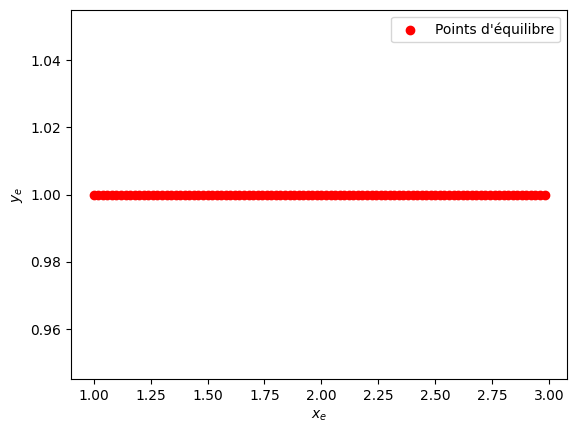

In [14]:
# nuages de point des points d'equilibre :

N = 100
dn = 2/100
y_e = []
x_e = []
for i in range(N):
    y_e.append(1)
    x_e.append(1+dn*i)



plt.scatter(x_e, y_e, c='red', label='Points d\'équilibre')  # il s'agit du segment entre [1,1] et [3,1] 
plt.xlabel('$x_e$')
plt.ylabel('$y_e$')
plt.legend()
plt.show()



1.5000129973
1.000044804
RESULT =  [0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32054979757, 0.32

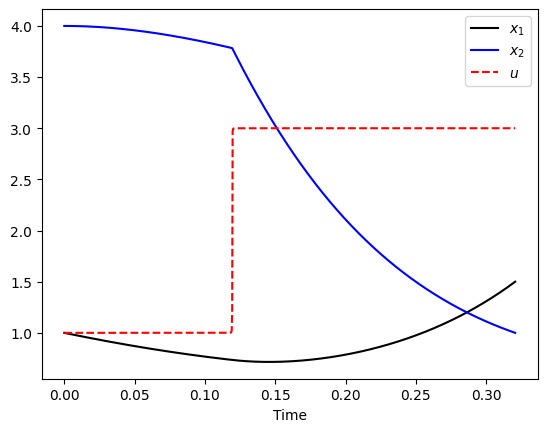

In [15]:
#2eme partie

a = 1.5
m = GEKKO() # initialize gekkofor 
nt = 1000
m.time = np.linspace(0,10,nt)



# Variables
x = m.Var(value=1)
y = m.Var(value=4)

#print(x.shape,y.shape)
p = np.zeros(nt) # mark final time point
p[-1] = 1.0
final = m.Param(value=p)

#temps final(ce qu'on cherche)
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1

u = m.MV(value=1,lb=1,ub=3)
u.STATUS = 1

# Equations
m.Equation(x.dt()==x*tf*(1-y*tf))
m.Equation(y.dt()== -y*tf*(u*tf-x*tf))
#m.Equation(x*final==a)
#m.Equation(y*final== 1 )


m.Obj(tf+(y*final-1)**2*1000000+(x*final-a)**2*1000000) #il faut forcer une contraint a etre respecte sinon il ne trouve pas( on force y*final a etre -1 ou x a etre 0 )
m.options.IMODE = 6
m.solve(disp=False) # solve

print(x.value[-1])
print(y.value[-1])
print("RESULT = ",tf.value)

print('Final Time: ' + str(tf.value[0]))
tm = np.linspace(0,tf.value[0],nt)
plt.figure(1)
plt.plot(tm,x.value,'k-',label=r'$x_1$')
plt.plot(tm,y.value,'b-',label=r'$x_2$')
plt.plot(tm,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()


On observe que la population d'insecte nuisibles baisse considérablement lors de l'intrusion de prédateur en masse, mais lorsque l'on limite l'intrusion de prédateurs, la population de prédateurs baissent via le manque d'insecte nuisible a manger,ce qui entraine un remonté de la population nuisibles. 

x(T) = 1.5000455706
y(T) = 1.0000794429
Final Time (T) = 0.58936664345


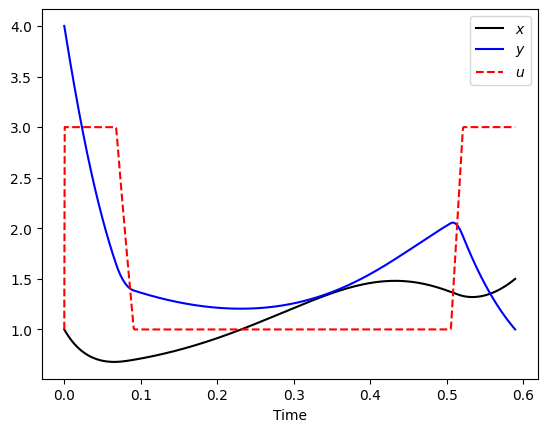

In [17]:


a = 1.5
alpha = 0.05
m = GEKKO()
nt = 1000
m.time = np.linspace(0, 10, nt)

# Variables
x = m.Var(value=1)
y = m.Var(value=4)
z = m.Var(value=0)  # coût u(t)^2

p = np.zeros(nt)  # Marquer le point de temps final
p[-1] = 1.0
final = m.Param(value=p)

# Temps final à optimiser
tf = m.FV(value=1.0, lb=0.1, ub=100.0)
tf.STATUS = 1

# Variable de contrôle
u = m.MV(value=1, lb=1, ub=3)
u.STATUS = 1

# Équations du système
m.Equation(x.dt() == x*tf*(1-y*tf))
m.Equation(y.dt() == -y*tf*(u*tf-x*tf))
m.Equation(z.dt() == (u*tf)**2)  # Coût accumulé du contrôle

# Objectif : minimiser combinaison convexe du temps final et du coût de contrôle
m.Obj(alpha*tf +(1-alpha)*z*final+ 
      (y*final-1)**2*1e5+
      (x*final-a)**2*1e5)

# Options de solution
m.options.IMODE = 6
m.solve(disp=False)  # Résoudre

# Afficher les résultats
print("x(T) =", x.value[-1])
print("y(T) =", y.value[-1])
print("Final Time (T) =", tf.value[0])

# Tracer les résultats
tm = np.linspace(0, tf.value[0], nt)
plt.figure(1)
plt.plot(tm, x.value, 'k-', label=r'$x$')
plt.plot(tm, y.value, 'b-', label=r'$y$')
plt.plot(tm, u.value, 'r--', label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()



x(T) = 1.9999961657
y(T) = 1.0000416831
Final Time (T) = 0.31326157562


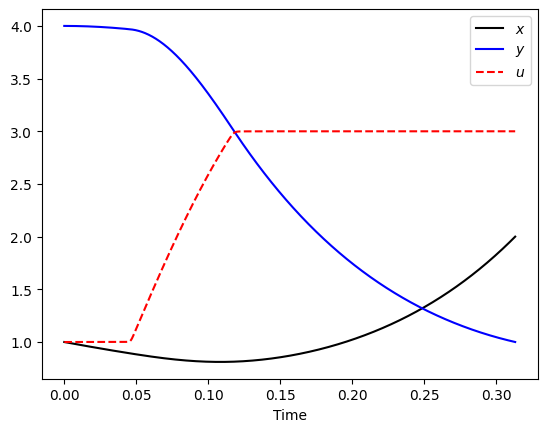

In [21]:
a = 2
alpha = 0.05
m = GEKKO()
nt = 1000
m.time = np.linspace(0, 10, nt)

# Variables
x = m.Var(value=1)
y = m.Var(value=4)
z = m.Var(value=0)  # coût u(t)^2

p = np.zeros(nt)  # Marquer le point de temps final
p[-1] = 1.0
final = m.Param(value=p)

# Temps final à optimiser
tf = m.FV(value=1.0, lb=0.1, ub=100.0)
tf.STATUS = 1

# Variable de contrôle
u = m.MV(value=1, lb=1, ub=3)
u.STATUS = 1

# Équations du système
m.Equation(x.dt() == x*tf*(1-y*tf))
m.Equation(y.dt() == -y*tf*(u*tf-x*tf))
m.Equation(z.dt() == (u*tf)**2)  # Coût accumulé du contrôle

# Objectif : minimiser combinaison convexe du temps final et du coût de contrôle
m.Obj(alpha*tf +(1-alpha)*z*final+ 
      (y*final-1)**2*1e5+
      (x*final-a)**2*1e5)

# Options de solution
m.options.IMODE = 6
m.solve(disp=False)  # Résoudre

# Afficher les résultats
print("x(T) =", x.value[-1])
print("y(T) =", y.value[-1])
print("Final Time (T) =", tf.value[0])

# Tracer les résultats
tm = np.linspace(0, tf.value[0], nt)
plt.figure(1)
plt.plot(tm, x.value, 'k-', label=r'$x$')
plt.plot(tm, y.value, 'b-', label=r'$y$')
plt.plot(tm, u.value, 'r--', label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()

x(T) = 1.9999948361
y(T) = 0.99999805195
Final Time (T) = 0.58803378957


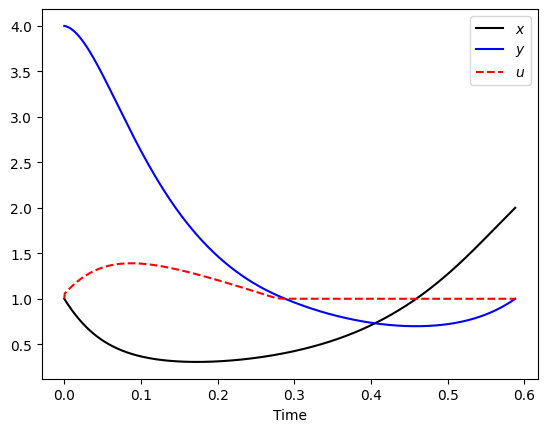

In [22]:
a = 2
alpha = 0.00005
m = GEKKO()
nt = 1000
m.time = np.linspace(0, 10, nt)

# Variables
x = m.Var(value=1)
y = m.Var(value=4)
z = m.Var(value=0)  # coût u(t)^2

p = np.zeros(nt)  # Marquer le point de temps final
p[-1] = 1.0
final = m.Param(value=p)

# Temps final à optimiser
tf = m.FV(value=1.0, lb=0.1, ub=100.0)
tf.STATUS = 1

# Variable de contrôle
u = m.MV(value=1, lb=1, ub=3)
u.STATUS = 1

# Équations du système
m.Equation(x.dt() == x*tf*(1-y*tf))
m.Equation(y.dt() == -y*tf*(u*tf-x*tf))
m.Equation(z.dt() == (u*tf)**2)  # Coût accumulé du contrôle

# Objectif : minimiser combinaison convexe du temps final et du coût de contrôle
m.Obj(alpha*tf +(1-alpha)*z*final+ 
      (y*final-1)**2*1e5+
      (x*final-a)**2*1e5)

# Options de solution
m.options.IMODE = 6
m.solve(disp=False)  # Résoudre

# Afficher les résultats
print("x(T) =", x.value[-1])
print("y(T) =", y.value[-1])
print("Final Time (T) =", tf.value[0])

# Tracer les résultats
tm = np.linspace(0, tf.value[0], nt)
plt.figure(1)
plt.plot(tm, x.value, 'k-', label=r'$x$')
plt.plot(tm, y.value, 'b-', label=r'$y$')
plt.plot(tm, u.value, 'r--', label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()

On observe que selon la valeur finale de x(T), le comportement et bien plus chaotique, une valeur a changé aussi et le alpha qui gere l'impacte du cout L² du contrôle qui permets lorsque qu'il est très bas d'avoir bien plus de variation dans le modèle. 